In [ ]:
#
import pandas as pd
#df = pd.DataFrame(PARAMS)
# Convert columns to float type


In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as  np
import pandas as pd
import os
# Final Function for nucleus parameters and cytoplasm
# Directory containing the images
input_dir = "C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\BCCD\\JPEGImages"
imagename = []
# List to store the processed images
processed_images = []
Nucleus_Areas = []
Nucleus_Perimeters = []
Area_hull = []
Perimeter_hull = []
def select_center_contour(contours):
        if len(contours) == 0:
            return None

        # Compute the areas of all contours
        contour_areas = [cv2.contourArea(contour) for contour in contours]

        # Find the index of the contour with the largest area
        max_area_index = np.argmax(contour_areas)

        # Return the contour with the largest area
        center_contour = contours[max_area_index]
        area = cv2.contourArea(center_contour)
        perimeter = cv2.arcLength(center_contour, True)
        Nucleus_Areas.append(area)
        Nucleus_Perimeters.append(perimeter)
        imagename.append(filename)
        return center_contour
# Iterate over the images in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image
        input_path = os.path.join(input_dir, filename)
        image = cv2.imread(input_path)

        # Perform the processing steps
        # image = cv2.imread(input_path)
        image_copy = image.copy()

        # plt.imshow(blurM)

        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        img_hsv = cv2.cvtColor(lab, cv2.COLOR_BGR2HSV)

        # Define the lower and upper bounds for the green color in the HSV color space
        lower_green = np.array([40, 130, 170])
        upper_green = np.array([90, 255, 255])

       # Threshold the HSV image based on the color range
        img_mask = cv2.inRange(img_hsv, lower_green, upper_green)
        # plt.imshow(img_mask)
        # Find contours in the thresholded image
        contours, _ = cv2.findContours(
            img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


        processed_images.append(img_mask)

        # Select the center contour
        center_contour = select_center_contour(contours)
        if center_contour is not None:
           convex_hull = cv2.convexHull(center_contour)
           Area_hull.append(cv2.contourArea(convex_hull))
           Perimeter_hull.append(cv2.arcLength(convex_hull, True))

        # Check if a center contour was found
       #if  center_contour is not None:
        # Draw the center contour on the image
        #cv2.drawContours(image_copy, [center_contour], -1, (0, 255, 0), 2)
        #cv2.drawContours(image_copy, [convex_hull], -1, (0, 0, 255), 2)



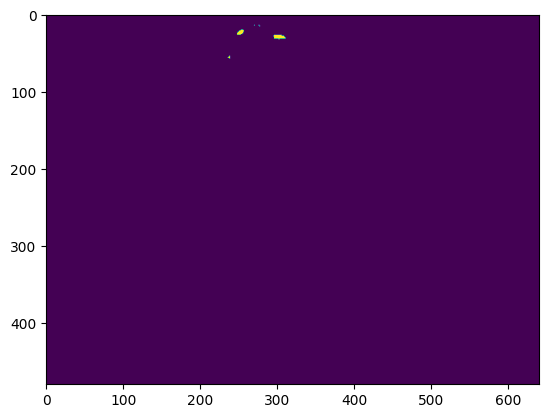

In [30]:
plt.imshow(processed_images[55])

In [5]:
PARAMS = {"IMAGE_NAME":imagename, "NUCLEUS_AREA": Nucleus_Areas,"NUCLEUS_PERIMETER": Nucleus_Perimeters, "CYTO_AREA": Area_hull, "CYTO_PERIMETER": Perimeter_hull}

In [6]:
df= pd.DataFrame(PARAMS)

In [8]:
df.head()

,IMAGE_NAME,NUCLEUS_AREA,NUCLEUS_PERIMETER,CYTO_AREA,CYTO_PERIMETER
0,20190527_113742_0_jpg.rf.4d4fa0a6fd1cc560df528...,2260.0,507.043718,3876.5,276.147269
1,20190527_113742_0_jpg.rf.d5180054f4317cd5d1c34...,18768.5,930.849846,25146.5,590.090352
2,20190527_114028_0_jpg.rf.b19407432a0e66b8b345a...,23.0,27.313708,32.0,25.464710
3,20190527_115225_0_jpg.rf.2d44924dc07ce5f59b214...,47230.0,1214.371706,52764.5,842.120576
4,20190527_115811_0_jpg.rf.15df06705b1342a37bd69...,6.0,11.656854,7.0,10.828427


In [ ]:
df.iloc[:,1:] = df.iloc[:,1:].astype(float)

df["cell_nucleus_area_r"] = df.CELL_AREA/df.NUCLEUS_AREA
df["cell_nucleus_peri_r"] = df.CELL_PERIMETER/df.NUCLEUS_PERIMETER
df["Solidity"] = df.NUCLEUS_AREA/df.CYTO_AREA
df["Convexity"] = df.CYTO_PERIMETER/df.NUCLEUS_PERIMETER
df["Circularity"] = df.NUCLEUS_PERIMETER * df.NUCLEUS_PERIMETER/(4*np.pi*df.NUCLEUS_AREA)
df["Cell_Type"]=None
df["Nucleus_area_upon_perimeter"] = df["NUCLEUS_AREA"]/df["NUCLEUS_PERIMETER"]

#df.drop(["CELL_AREA","CELL_PERIMETER"],axis = 1, inplace=True)

df.sort_values("Nucleus_area_upon_perimeter")

In [50]:
import pandas as pd

# Try different encodings until the file is correctly decoded
encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
for encoding in encodings:
    try:
        df = pd.read_csv('C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\wbc_data.csv', encoding=encoding)
        print(encoding)
        break
    except UnicodeDecodeError:
        continue

utf-8


In [58]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\wbc_data.csv', encoding=encoding)
df.head()

,S.N,Labels,F1,F2,F3,F4,F5,F6,F7,F8,...,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51
0,1,4,0.998669,0.964651,0.984931,0.884154,0.995850,0.932902,1.00012,0.929843,...,1.836840,1.13666,0.502641,0.944199,0.657148,0.978494,1.760420,0.004786,0.939551,245.204
1,2,4,0.978787,0.851060,0.683255,0.259461,0.895572,0.682199,1.01701,0.653529,...,0.438285,1.18325,0.813150,0.958764,1.010510,1.025020,0.561364,0.025555,0.524963,158.854
2,3,4,1.003070,0.972615,0.912070,0.778764,0.990626,1.024890,1.00127,1.023190,...,0.553793,1.14963,0.414020,0.913237,0.209406,0.957298,0.507088,0.009233,0.766351,211.843
3,4,4,1.003840,0.594213,0.813871,0.311328,0.938251,0.470885,1.02158,0.290526,...,0.649827,1.07605,0.860965,0.960133,0.862213,1.002390,0.848396,0.024564,0.642194,125.242
4,5,4,1.003460,0.930368,0.912457,0.572494,0.989024,0.868442,1.00637,0.531452,...,1.118860,1.15033,1.183330,0.917949,1.145050,0.973160,1.053050,0.010256,0.710701,213.606


In [52]:
df.columns

Index(['S.N', 'Labels', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',
       'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19',
       'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29',
       'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39',
       'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49',
       'F50', 'F51'],
      dtype='object')

In [53]:
X=df.iloc[:,2:]

In [54]:
y=df["Labels"]
y

0       4
1       4
2       4
3       4
4       4
       ..
2730    4
2731    4
2732    4
2733    4
2734    4
Name: Labels, Length: 2735, dtype: int64

In [60]:
from sklearn.cluster import KMeans
# Perform k-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
print(labels.shape)

(2735,)


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

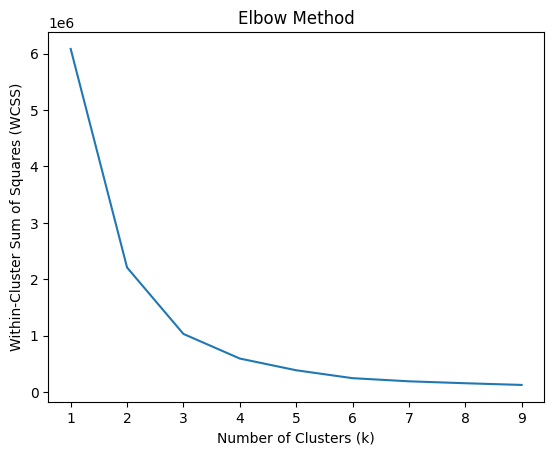

In [61]:
k_values = range(1, 10)  # Range of k values to test
wcss = []  # Within-cluster sum of squares

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for different k values
plt.plot(k_values, wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)


LinearRegression()

In [56]:
y_pred = model.predict(X)

In [62]:
y_pred

array([2.30485074, 3.60040774, 3.11326532, ..., 4.17806788, 2.77660155,
       3.17744684])

In [64]:
y

0       4
1       4
2       4
3       4
4       4
       ..
2730    4
2731    4
2732    4
2733    4
2734    4
Name: Labels, Length: 2735, dtype: int64